# Практика

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

Выбрано распределение upper truncated Pareto, позволяют ограничить х и тем самым упростить выбор размерности по х для графиков.

In [46]:
# ваш код тут
import numpy as np
from scipy.stats import truncpareto


# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
# cosine_rv = sts.cosine()
# sample = cosine_rv.rvs(100)
# sample

In [48]:
rho = 36.5
rv_truncpareto= truncpareto(2,5)
samples = rv_truncpareto.rvs(100)
real_mean = rv_truncpareto.mean() # настоящее среднее случайной величины
real_var = rv_truncpareto.var() # настоящая дисперсия случайной величины

In [49]:
print("real_mean - " , real_mean , "real_var - " , real_var)

real_mean -  1.6666666666666667 real_var -  0.5752178731265976


### Постройте гистограмму выборки и теоретическую плотность распределения

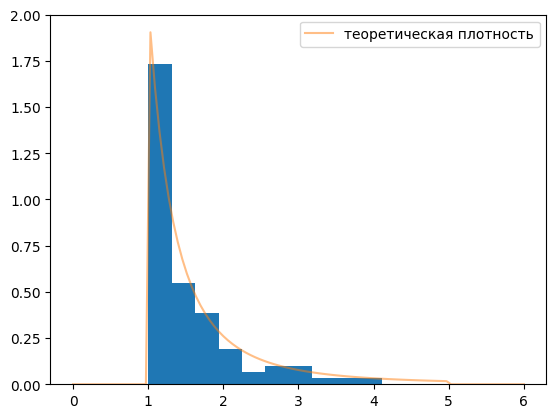

In [79]:
# ваш код тут
plt.hist(samples, density=True)
x = np.linspace(0,6,100)
pdf = rv_truncpareto.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [80]:
sample_mean = samples.mean() # выборочное среднее
print(sample_mean)
sample_var = samples.var() # выборочная дисперсия
print(sample_var)

1.5240534437264999
0.4080109338818605


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

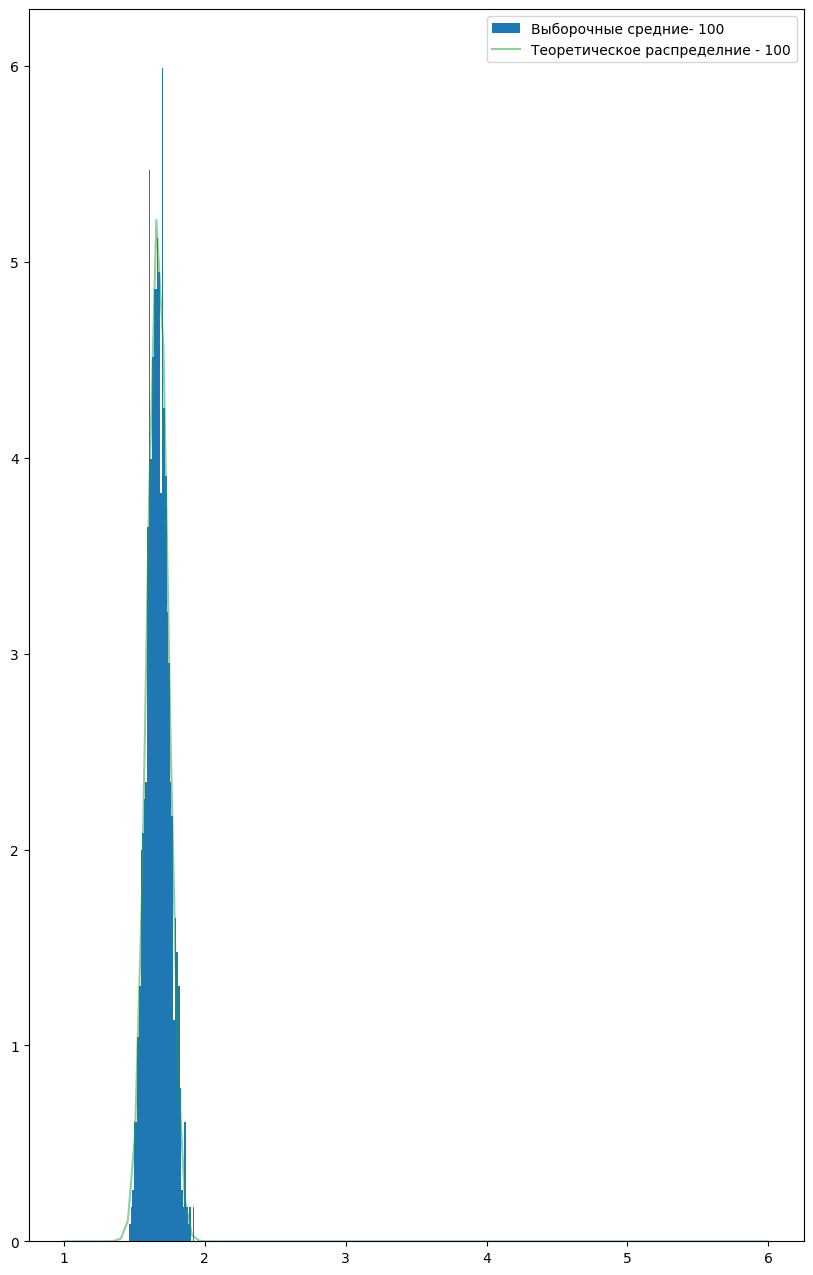

In [104]:
# Один обьем выборки
newcolors = ['#21A038','#0087CD','#00D900', '#FAED00',  '#42E3B4','#21BA72']
# ваш код тут
num_means = 1000
size = [ 100]# количество точек для распределения
plt.figure(figsize=(10,16))
for j in range(len(size)):
    N = size[j]
    means = []
    teor_mean = []
    for i in range(num_means):
        means.append(rv_truncpareto.rvs(N).mean())
    plt.hist(means, density=True,  bins=40, label=f'Выборочные средние- {N}')
    norm_rv = sts.norm(loc=rv_truncpareto.mean(), scale=rv_truncpareto.std() / np.sqrt(N))
    x = np.linspace(1,6, N)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label=f'Теоретическое распределние - {N}', alpha=0.5, color=newcolors[j])

plt.legend()
plt.show()

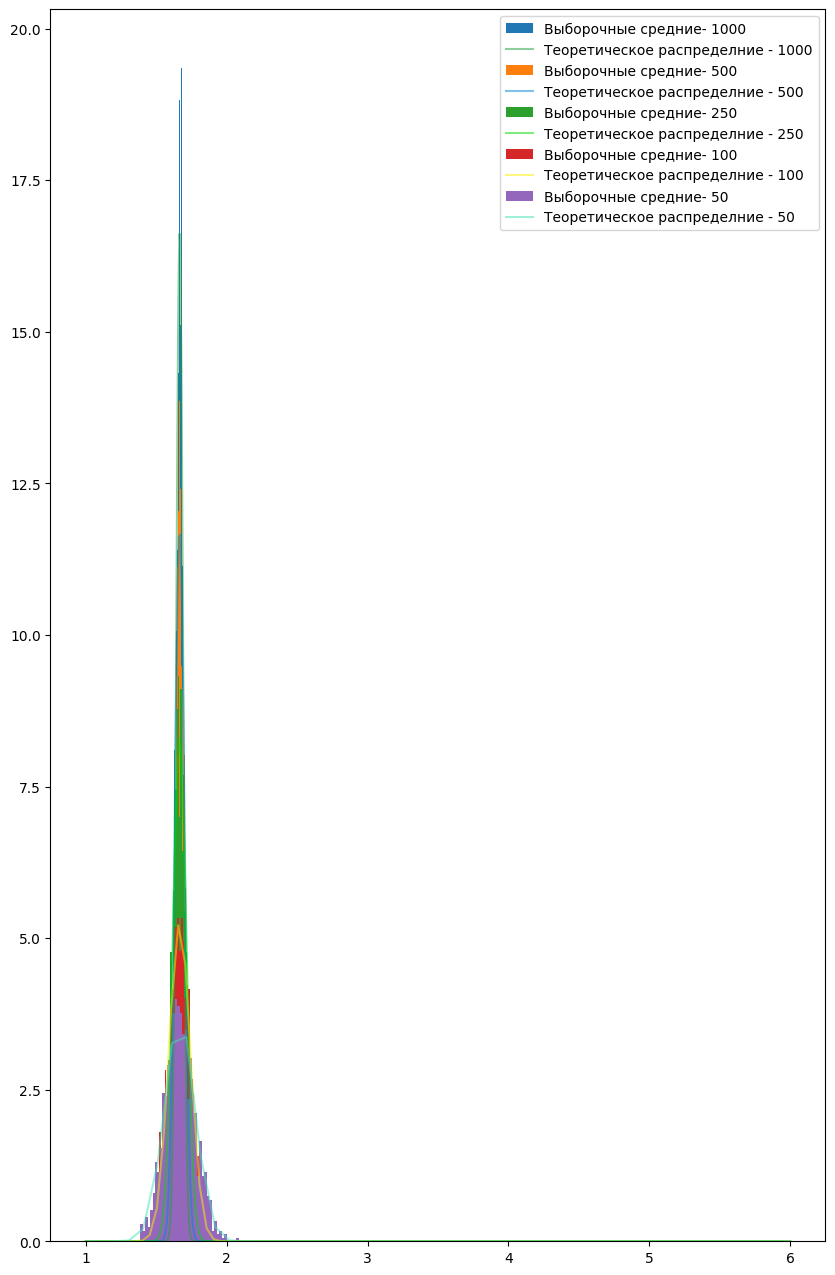

In [102]:
# Несколько обьмов выборки
newcolors = ['#21A038','#0087CD','#00D900', '#FAED00',  '#42E3B4','#21BA72']
# ваш код тут
num_means = 1000
size = [ 1000, 500, 250, 100, 50] # количество точек для распределения
plt.figure(figsize=(10,16))
for j in range(len(size)):
    N = size[j]
    means = []
    teor_mean = []
    for i in range(num_means):
        means.append(rv_truncpareto.rvs(N).mean())
    plt.hist(means, density=True,  bins=40, label=f'Выборочные средние- {N}')
    norm_rv = sts.norm(loc=rv_truncpareto.mean(), scale=rv_truncpareto.std() / np.sqrt(N))
    x = np.linspace(1,6, N)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label=f'Теоретическое распределние - {N}', alpha=0.5, color=newcolors[j])

plt.legend()
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?

**Ваш ответ:**


Для выборочного среднего апроксимация впринципе работает неплохо однако, чем меньше наблюдений тем хуже апрокисмация

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [106]:
# либо загружаем из альтернативного хранилища
url ="telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [109]:
from statsmodels.stats.weightstats import _zconfint_generic

In [113]:
churn_t = df[df.churn == True]['total day calls'].copy()
churn_f = df[df.churn == False]['total day calls'].copy()

In [117]:
#Доверительный интерал функция оба варианта
def calc_conf_intervals(data, alpha=0.05): 
    std = np.std(data, ddof=1)
    n = data.shape[0]
    mean = np.mean(data)

    margin_error = sts.norm.ppf(1 - alpha/2) * (std / np.sqrt(n))
    ci_manual = (mean - margin_error, mean + margin_error)

    return ci_manual, _zconfint_generic(mean, std/np.sqrt(n), alpha, 'two-sided')

Доверительный интервал для среднего по цпт интервальная оценка: (99.55618833318324 , 101.01012745629045)
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.55618833318324 , 101.01012745629045)


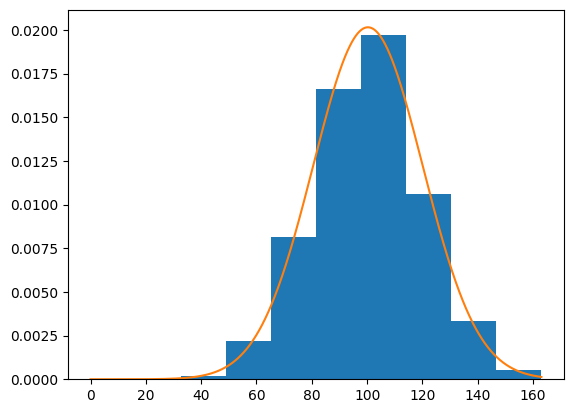

In [134]:
# Доверительный интервал для не ушедших
my_clt, zconf  =  calc_conf_intervals(churn_f)
print("Доверительный интервал для среднего по цпт интервальная оценка: ({} , {})".format( *my_clt))
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: ({} , {})".format( *zconf))

plt.hist(churn_f, density=True)
x = np.linspace(churn_f.min(),churn_f.max(),len(churn_f))
norm_rv = sts.norm(np.mean(churn_f), np.std(churn_f, ddof=1)) 
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

Доверительный интервал для среднего по цпт интервальная оценка: (99.41066229112079 , 103.26014516229537)
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.41066229112079 , 103.26014516229537)


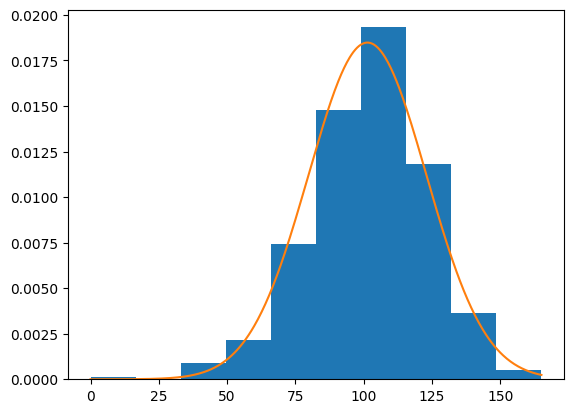

In [132]:
# Доверительный интервал для ушедших
my_clt, zconf  =  calc_conf_intervals(churn_t)
print("Доверительный интервал для среднего по цпт интервальная оценка: ({} , {})".format( *my_clt ))
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: ({} , {})".format( *zconf ))

plt.hist(churn_t, density=True)
x = np.linspace(churn_t.min(),churn_t.max(),len(churn_t))
norm_rv = sts.norm(np.mean(churn_t), np.std(churn_t, ddof=1)) 
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)